# 多项式回归

## 1.数据准备

/home/mj/.conda/envs/ten/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


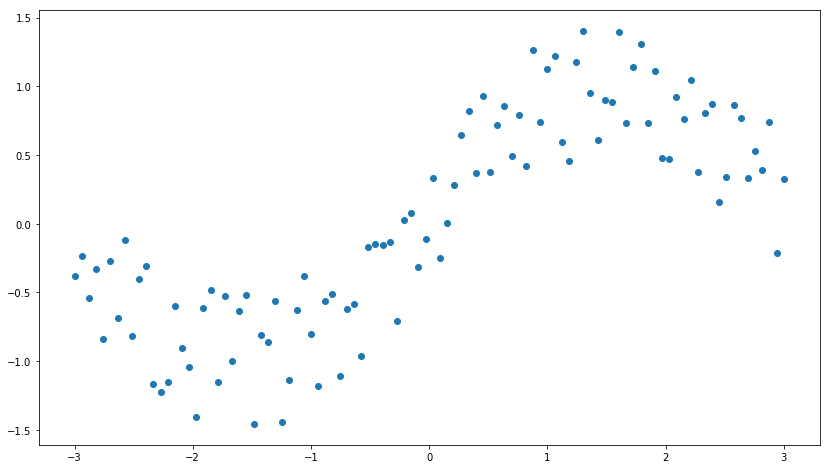

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14,8)

n_observation = 100
xs = np.linspace(-3,3,n_observation)
ys = np.sin(xs) + np.random.uniform(-0.5,0.5,n_observation)
plt.scatter(xs,ys)
plt.show()

In [2]:
X = tf.placeholder(tf.float32,name='X')
Y = tf.placeholder(tf.float32,name='Y')

In [3]:
W = tf.Variable(tf.random_normal([1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

In [4]:
Y_pred = tf.add(tf.multiply(X,W),b)
#添加高次项
W_2 = tf.Variable(tf.random_normal([1]),name='weight_2')
Y_pred = tf.add(tf.multiply(tf.pow(X,2),W_2),Y_pred)
W_3 = tf.Variable(tf.random_normal([1]),name='weight_3')
Y_pred = tf.add(tf.multiply(tf.pow(X,3),W_3),Y_pred)

In [5]:
smaple_sum = xs.shape[0]
loss = tf.reduce_sum(tf.pow(Y_pred -Y,2)) / smaple_sum

In [6]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [7]:
n_samples = xs.shape[0]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter('./graphs/polynomial_reg',sess.graph)
    
    for i in range(1000):
        total_loss = 0
        for x,y in zip(xs,ys):
            _,l = sess.run([optimizer,loss],feed_dict={X:x,Y:y})
            total_loss += l
        if i%20 == 0:
            print('Epoch {0}:{1}'.format(i,total_loss/n_samples))
            

    writer.close()
    W,W_2,W_3,b = sess.run([W,W_2,W_3,b])
    

Epoch 0:0.7779122897841433
Epoch 20:0.0024255863251164116
Epoch 40:0.001984438613694692
Epoch 60:0.0016784230671512558
Epoch 80:0.0014648992723829224
Epoch 100:0.0013159231578680419
Epoch 120:0.0012120090439850628
Epoch 140:0.0011395628865045638
Epoch 160:0.0010890909197019028
Epoch 180:0.0010539646671201552
Epoch 200:0.0010295518703502893
Epoch 220:0.0010126168016395098
Epoch 240:0.0010008974225565338
Epoch 260:0.0009928122821484097
Epoch 280:0.0009872569143453802
Epoch 300:0.0009834594670862628
Epoch 320:0.000980880693269448
Epoch 340:0.0009791448469597696
Epoch 360:0.000977989715003673
Epoch 380:0.00097723299085942
Epoch 400:0.0009767478800465313
Epoch 420:0.0009764464946384819
Epoch 440:0.0009762683517493898
Epoch 460:0.000976171606634324
Epoch 480:0.0009761278833025245
Epoch 500:0.0009761177452827497
Epoch 520:0.000976127549819239
Epoch 540:0.0009761491139585132
Epoch 560:0.0009761765974303672
Epoch 580:0.0009762063714146052
Epoch 600:0.0009762360072664933
Epoch 620:0.000976264317